In [1]:
import torch
import torch.optim as optim
import os
from resolve.helpers.losses import log_prob
from resolve.utilities import utilities as utils
from resolve.helpers import DataGeneration
from resolve.helpers import Trainer, ModelsManager
from resolve.helpers import AsymmetricFocalWithFPPenalty, log_prob, recon_loss_mse, skip_loss, bce_with_logits, brier
from torch.utils.tensorboard import SummaryWriter
from resolve.helpers import UMAPAnalyzer
import yaml
import json
import numpy as np


In [2]:
# Set the path to the yaml settings file here
path_to_settings = "./binary-black-hole/"
with open(f"{path_to_settings}/settings.yaml", "r") as f:
    config_file = yaml.safe_load(f)

torch.manual_seed(0)
version = config_file["path_settings"]["version"]
path_out = f'{config_file["path_settings"]["path_out_model"]}/model-{version}'

In [3]:
# load data:
config_file["model_settings"]["train"]["dataset"]["train_ratio"]=1.
config_file["model_settings"]["train"]["dataset"]["val_ratio"]=0.
config_file["model_settings"]["train"]["dataset"]["test_ratio"]=0.

dataset_train = DataGeneration(mode = "train", 
                                config_file=config_file
                                )

dataset_train.set_dataset(shuffle=False)

if config_file["model_settings"]["train"]["dataset"]["use_feature_normalization"] == "zscore":
    print("theta mean: ", dataset_train.dataset._normalizer._get_scaler("theta").mean_)
    print("phi mean: ", dataset_train.dataset._normalizer._get_scaler("phi").mean_)
elif config_file["model_settings"]["train"]["dataset"]["use_feature_normalization"] == "minmax":
    print("theta mean: ", dataset_train.dataset._normalizer._get_scaler("theta").data_range_)
    print("phi mean: ", dataset_train.dataset._normalizer._get_scaler("phi").data_range_)



positives ratio  tensor(0.0073)
theta mean:  [1.50423200e-02 4.99557795e+00 5.00162000e+02 4.98470000e+02]
phi mean:  [3.09912000e-02 1.38451402e+01 7.49881529e+01 3.83905393e+01
 1.93798800e-01 5.03367206e-01 1.08481965e+02 1.17347808e+01
 1.09972412e+01 9.90653600e-01]


In [4]:
loader = dataset_train.set_loader(mode="train", shuffle=True)
batches =np.arange(50)
#batches = [10]
umap = UMAPAnalyzer(batches = batches)
umap.extract_features(loader)

In [5]:
#umap.fit_umap("local")
#umap.plot()

/Users/aschuetz/Software/miniconda3/envs/resolve-py3.11/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP(angular_rp_forest=True, metric='cosine', n_epochs=120, n_jobs=1, n_neighbors=30, random_state=42, verbose=True)
Tue Oct 28 09:56:32 2025 Construct fuzzy simplicial set
Tue Oct 28 09:56:32 2025 Finding Nearest Neighbors
Tue Oct 28 09:56:32 2025 Building RP forest with 30 trees
Tue Oct 28 09:56:35 2025 NN descent for 18 iterations
	 1  /  18
	 2  /  18
	Stopping threshold met -- exiting after 2 iterations
Tue Oct 28 09:56:51 2025 Finished Nearest Neighbor Search
Tue Oct 28 09:56:53 2025 Construct embedding


Epochs completed:   0%|            0/120 [00:00]

	completed  0  /  120 epochs
	completed  12  /  120 epochs
	completed  24  /  120 epochs
	completed  36  /  120 epochs
	completed  48  /  120 epochs
	completed  60  /  120 epochs
	completed  72  /  120 epochs
	completed  84  /  120 epochs
	completed  96  /  120 epochs
	completed  108  /  120 epochs
Tue Oct 28 09:58:03 2025 Finished embedding


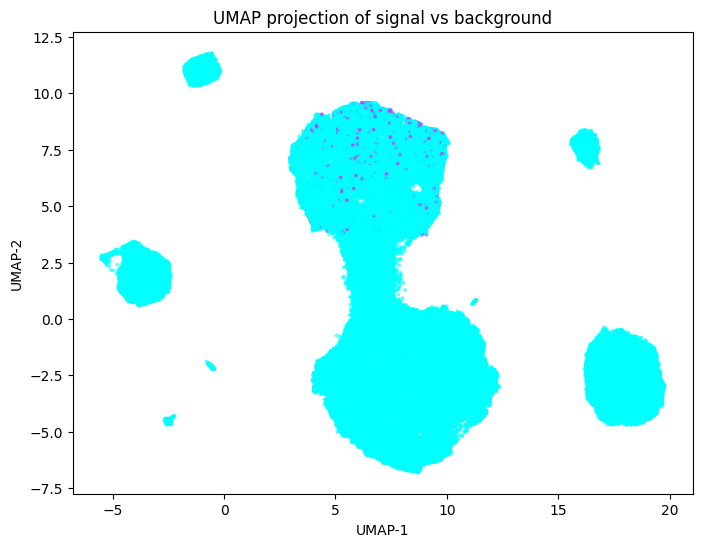

In [6]:
umap.fit_umap("global")
umap.plot()

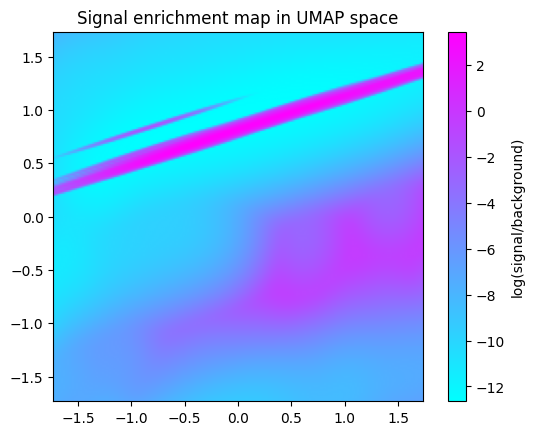

In [7]:
umap.log_signal_over_background_kde()

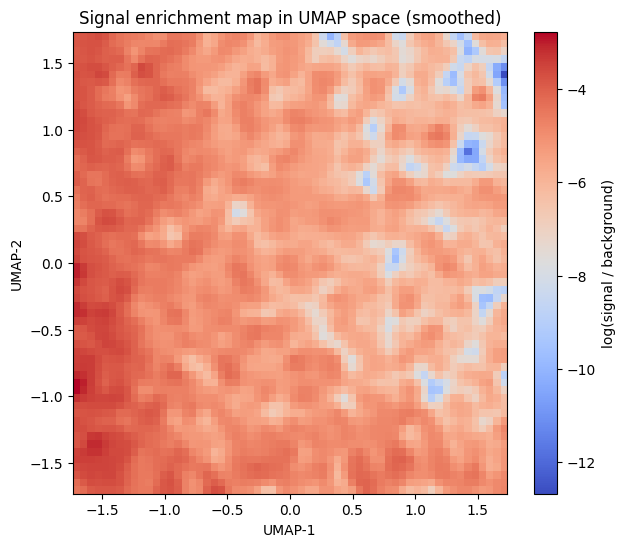

In [8]:
umap.log_signal_over_background_filtered()

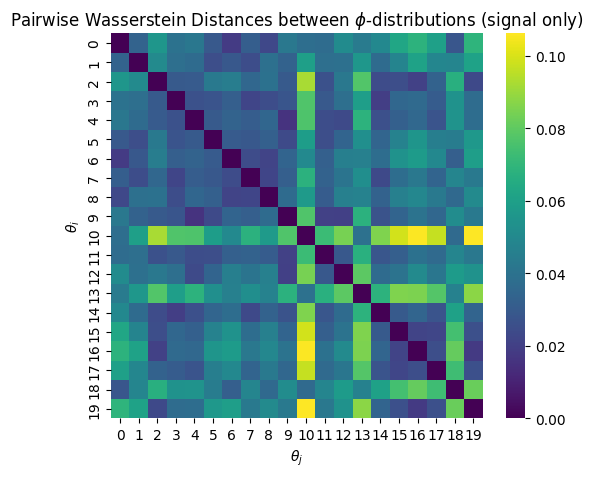

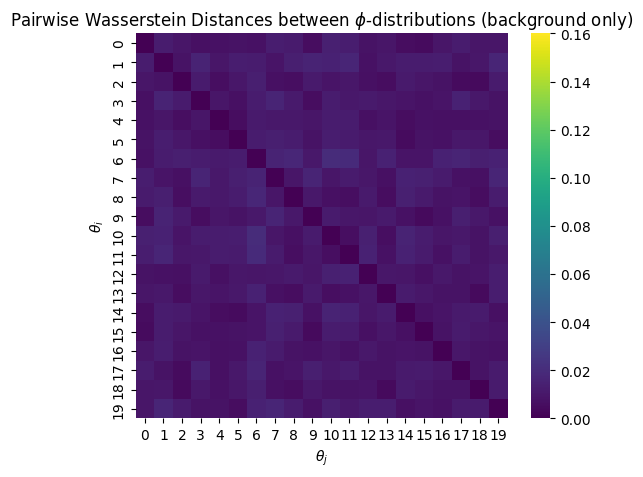

In [9]:

umap.pairwise_wasserstein_distance(loader)